
--- Transactions ---

Shape: (1000, 7)

Columns: ['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate', 'Quantity', 'TotalValue', 'Price']

Data Types:
 TransactionID       object
CustomerID          object
ProductID           object
TransactionDate     object
Quantity             int64
TotalValue         float64
Price              float64
dtype: object

Missing Values:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

Descriptive Statistics:
           Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000

Plotting distribution of transact

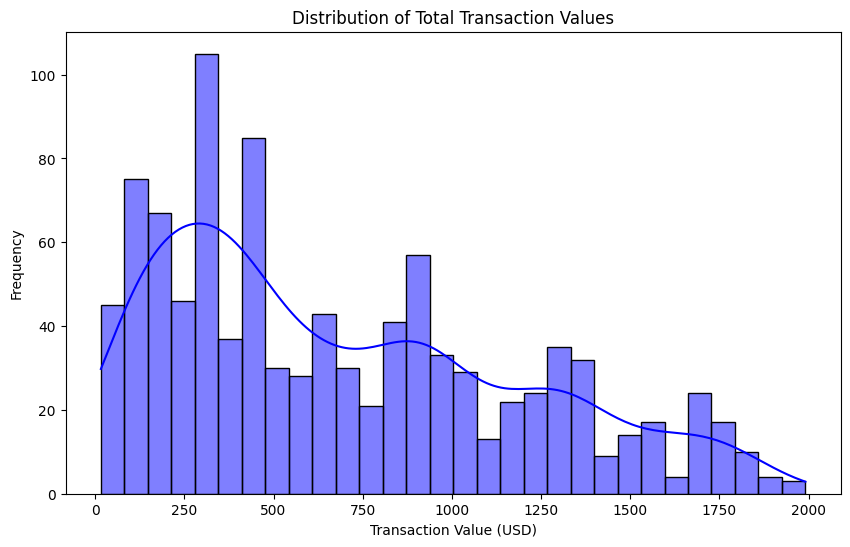


Analyzing transaction trends over time...


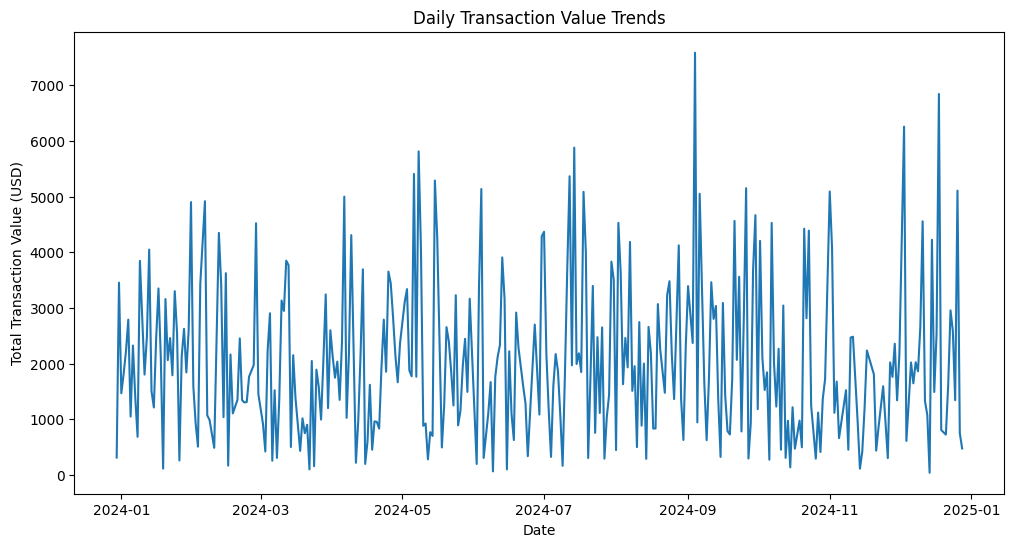


--- Products ---

Shape: (100, 4)

Columns: ['ProductID', 'ProductName', 'Category', 'Price']

Data Types:
 ProductID       object
ProductName     object
Category        object
Price          float64
dtype: object

Missing Values:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Descriptive Statistics:
             Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000

Plotting product counts by category...


C:\Users\visut\AppData\Local\Temp\ipykernel_19216\3369423478.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=products['Category'], order=products['Category'].value_counts().index, palette='viridis')


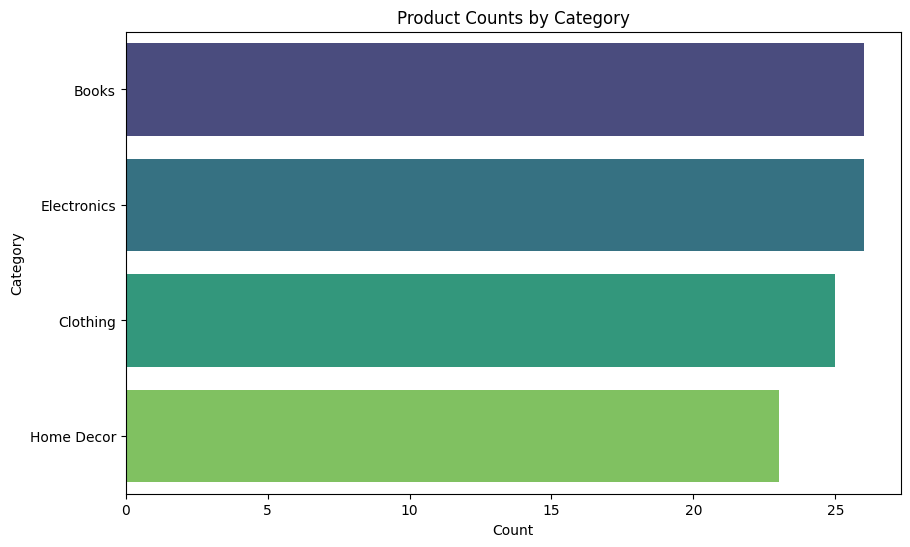


Plotting price distribution for products...


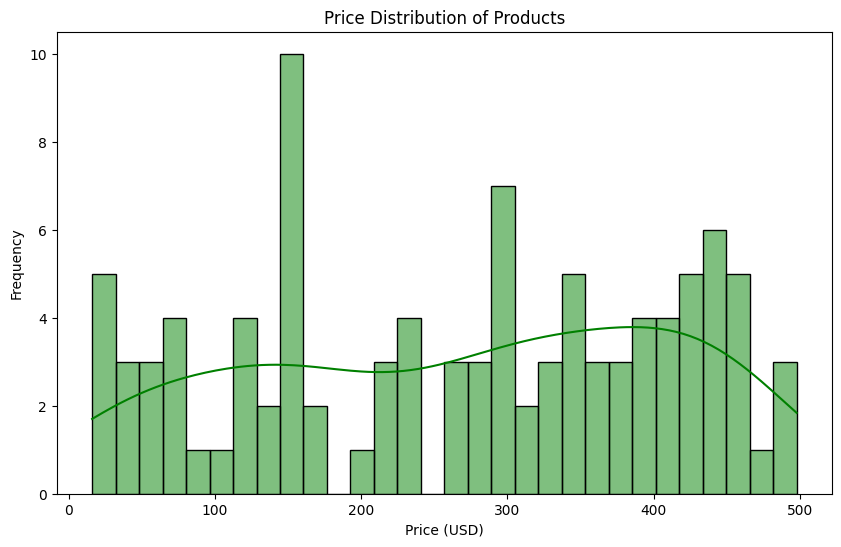


--- Customers ---

Shape: (200, 4)

Columns: ['CustomerID', 'CustomerName', 'Region', 'SignupDate']

Data Types:
 CustomerID      object
CustomerName    object
Region          object
SignupDate      object
dtype: object

Missing Values:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Descriptive Statistics:
        CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3

Analyzing customer sign-up trends...


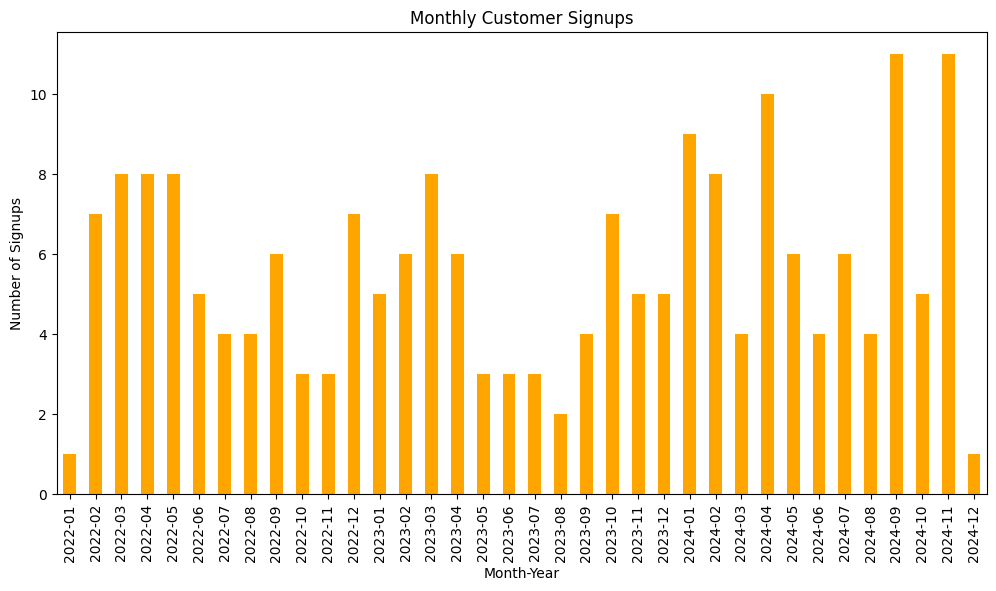


Plotting customer count by region...


C:\Users\visut\AppData\Local\Temp\ipykernel_19216\3369423478.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=customers['Region'], order=customers['Region'].value_counts().index, palette='coolwarm')


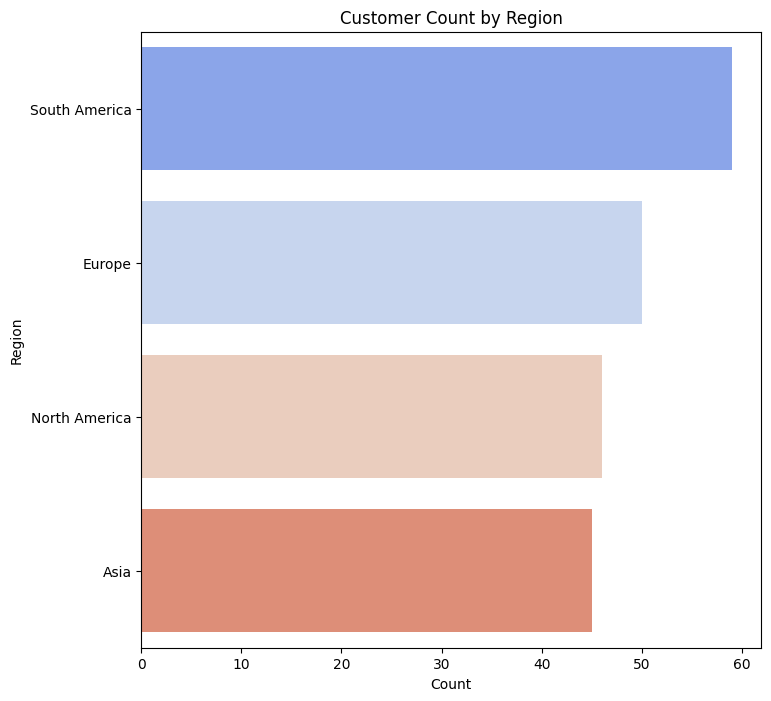


--- Merged Dataset ---

Shape: (1000, 13)

Columns:
 ['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate', 'Quantity', 'TotalValue', 'Price_x', 'ProductName', 'Category', 'Price_y', 'CustomerName', 'Region', 'SignupDate']

Plotting transaction value by product category...


C:\Users\visut\AppData\Local\Temp\ipykernel_19216\3369423478.py:127: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='TotalValue', data=data_merged, palette='coolwarm')


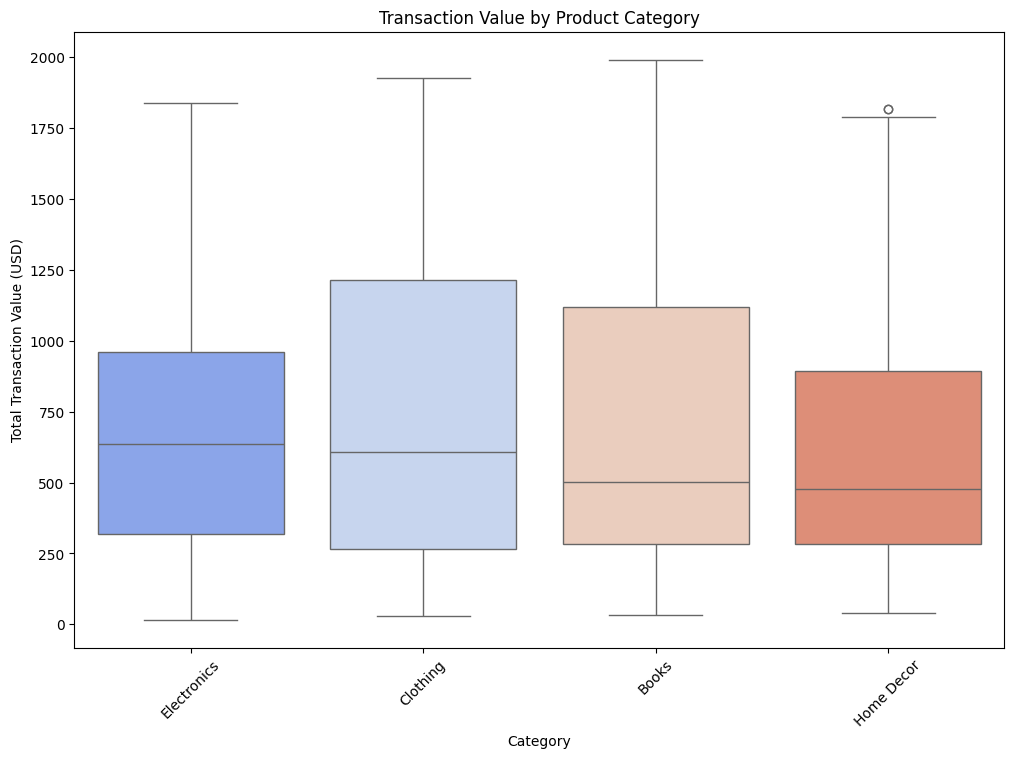

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the datasets
transactions = pd.read_csv('Transactions.csv')
products = pd.read_csv('Products.csv')
customers = pd.read_csv('Customers.csv')

# Function to perform basic EDA on a dataset
def perform_basic_eda(df, name):
    print(f"\n--- {name} ---\n")
    print("Shape:", df.shape)
    print("\nColumns:", df.columns.tolist())
    print("\nData Types:\n", df.dtypes)
    print("\nMissing Values:\n", df.isnull().sum())
    print("\nDescriptive Statistics:\n", df.describe())

# Perform EDA for Transactions
def transactions_eda(transactions):
    perform_basic_eda(transactions, "Transactions")

    # Distribution of total transaction value
    if 'TotalValue' in transactions.columns:
        print("\nPlotting distribution of transaction values...")
        plt.figure(figsize=(10, 6))
        sns.histplot(transactions['TotalValue'], kde=True, bins=30, color='blue')
        plt.title('Distribution of Total Transaction Values')
        plt.xlabel('Transaction Value (USD)')
        plt.ylabel('Frequency')
        plt.show()

    # Transaction trends over time
    if 'TransactionDate' in transactions.columns:
        print("\nAnalyzing transaction trends over time...")
        transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
        daily_transactions = transactions.groupby(transactions['TransactionDate'].dt.date)['TotalValue'].sum()
        plt.figure(figsize=(12, 6))
        daily_transactions.plot()
        plt.title('Daily Transaction Value Trends')
        plt.xlabel('Date')
        plt.ylabel('Total Transaction Value (USD)')
        plt.show()

# Perform EDA for Products
def products_eda(products):
    perform_basic_eda(products, "Products")

    # Product count by category
    if 'Category' in products.columns:
        print("\nPlotting product counts by category...")
        plt.figure(figsize=(10, 6))
        sns.countplot(y=products['Category'], order=products['Category'].value_counts().index, palette='viridis')
        plt.title('Product Counts by Category')
        plt.xlabel('Count')
        plt.ylabel('Category')
        plt.show()

    # Price distribution
    if 'Price' in products.columns:
        print("\nPlotting price distribution for products...")
        plt.figure(figsize=(10, 6))
        sns.histplot(products['Price'], kde=True, bins=30, color='green')
        plt.title('Price Distribution of Products')
        plt.xlabel('Price (USD)')
        plt.ylabel('Frequency')
        plt.show()

# Perform EDA for Customers
def customers_eda(customers):
    perform_basic_eda(customers, "Customers")

    # Customer sign-up trends
    if 'SignupDate' in customers.columns:
        print("\nAnalyzing customer sign-up trends...")
        customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
        monthly_signups = customers.groupby(customers['SignupDate'].dt.to_period('M'))['CustomerID'].count()
        plt.figure(figsize=(12, 6))
        monthly_signups.plot(kind='bar', color='orange')
        plt.title('Monthly Customer Signups')
        plt.xlabel('Month-Year')
        plt.ylabel('Number of Signups')
        plt.show()

    # Gender distribution
    if 'Region' in customers.columns:
        print("\nPlotting customer count by region...")
        plt.figure(figsize=(8, 8))
        sns.countplot(y=customers['Region'], order=customers['Region'].value_counts().index, palette='coolwarm')
        plt.title('Customer Count by Region')
        plt.xlabel('Count')
        plt.ylabel('Region')
        plt.show()

# Perform EDA
transactions_eda(transactions)
products_eda(products)
customers_eda(customers)

# Merging datasets for cross-analysis
data_merged = pd.merge(transactions, products, on='ProductID', how='left')
data_merged = pd.merge(data_merged, customers, on='CustomerID', how='left')

# Analyze merged dataset
if data_merged is not None:
    print("\n--- Merged Dataset ---\n")
    print("Shape:", data_merged.shape)
    print("\nColumns:\n", data_merged.columns.tolist())

    # Scatter plot: TotalValue vs. Age
    if 'TotalValue' in data_merged.columns and 'Age' in data_merged.columns:
        print("\nPlotting TotalValue vs. Age...")
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x='Age', y='TotalValue', data=data_merged, alpha=0.7, color='purple')
        plt.title('Total Transaction Value vs. Customer Age')
        plt.xlabel('Age')
        plt.ylabel('Total Transaction Value (USD)')
        plt.show()

    # Box plot for TotalValue by Category
    if 'TotalValue' in data_merged.columns and 'Category' in data_merged.columns:
        print("\nPlotting transaction value by product category...")
        plt.figure(figsize=(12, 8))
        sns.boxplot(x='Category', y='TotalValue', data=data_merged, palette='coolwarm')
        plt.title('Transaction Value by Product Category')
        plt.xlabel('Category')
        plt.ylabel('Total Transaction Value (USD)')
        plt.xticks(rotation=45)
        plt.show()

# Predictive modeling: TotalValue prediction
if 'TotalValue' in data_merged.columns and 'Age' in data_merged.columns:
    print("\nPredicting transaction amounts using Random Forest...")

    # Selecting features and target variable
    features = data_merged[['Age']]
    target = data_merged['TotalValue']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    # Random Forest model
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)

    # Predictions and evaluation
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared Score: {r2}")

    # Feature importance
    print("\nFeature Importance:")
    for feature, importance in zip(features.columns, model.feature_importances_):
        print(f"{feature}: {importance}")
